In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

# Indroduction

This project aims at predicting diamond price based on its features using regression models

Diamonds data set available on kaggle (https://www.kaggle.com/enashed/diamond-prices)

# Project Planning
1. Data exploration
2. Feature engineering
3. Data preprocessing for model
4. Basic model building
5. Model Tuning
6. Ensemble model building
7. Results

# Data Exploration

In [2]:
data = pd.read_csv("./diamonds_project/diamonds.csv")

In [3]:
X = data[data.columns.difference(['total_sales_price'])]
y = data["total_sales_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
X_train.head()

,clarity,color,culet_condition,culet_size,cut,date,depth_percent,diamond_id,eye_clean,fancy_color_dominant_color,...,girdle_min,lab,meas_depth,meas_length,meas_width,polish,shape,size,symmetry,table_percent
73636,VVS1,F,NaN,N,Excellent,2022-02-24,61.0,135883558,Yes,NaN,...,M,GIA,2.51,4.09,4.13,Excellent,Round,0.26,Excellent,60.0
185258,VS1,D,NaN,N,NaN,2022-02-24,64.7,134868152,Yes,NaN,...,TK,GIA,3.55,8.74,5.49,Excellent,Pear,1.01,Very Good,63.0
210771,SI1,E,NaN,N,NaN,2022-02-24,72.6,83696410,NaN,NaN,...,M,GIA,5.09,7.06,7.01,Excellent,Princess,2.01,Very Good,72.0
187064,VVS1,G,NaN,N,Excellent,2022-02-24,63.8,135849848,NaN,NaN,...,M,GIA,3.89,6.06,6.11,Excellent,Round,0.90,Excellent,56.0
90515,SI2,I,NaN,NaN,Excellent,2022-02-24,60.6,133703839,NaN,NaN,...,NaN,GIA,3.10,5.10,5.13,Very Good,Round,0.50,Very Good,59.0


In [5]:
y_train.head()

73636      1082
185258     8818
210771    24113
187064     9605
90515      1386
Name: total_sales_price, dtype: int64

In [6]:
X_train.dtypes

clarity                         object
color                           object
culet_condition                 object
culet_size                      object
cut                             object
date                            object
depth_percent                  float64
diamond_id                       int64
eye_clean                       object
fancy_color_dominant_color      object
fancy_color_intensity           object
fancy_color_overtone            object
fancy_color_secondary_color     object
fluor_color                     object
fluor_intensity                 object
girdle_max                      object
girdle_min                      object
lab                             object
meas_depth                     float64
meas_length                    float64
meas_width                     float64
polish                          object
shape                           object
size                           float64
symmetry                        object
table_percent            

In [7]:
X_train.shape

(164778, 26)

In [8]:
X_train.columns

Index(['clarity', 'color', 'culet_condition', 'culet_size', 'cut', 'date',
       'depth_percent', 'diamond_id', 'eye_clean',
       'fancy_color_dominant_color', 'fancy_color_intensity',
       'fancy_color_overtone', 'fancy_color_secondary_color', 'fluor_color',
       'fluor_intensity', 'girdle_max', 'girdle_min', 'lab', 'meas_depth',
       'meas_length', 'meas_width', 'polish', 'shape', 'size', 'symmetry',
       'table_percent'],
      dtype='object')

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164778 entries, 73636 to 40714
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   clarity                      164778 non-null  object 
 1   color                        157889 non-null  object 
 2   culet_condition              11515 non-null   object 
 3   culet_size                   100516 non-null  object 
 4   cut                          119351 non-null  object 
 5   date                         164778 non-null  object 
 6   depth_percent                164778 non-null  float64
 7   diamond_id                   164778 non-null  int64  
 8   eye_clean                    46931 non-null   object 
 9   fancy_color_dominant_color   6891 non-null    object 
 10  fancy_color_intensity        6889 non-null    object 
 11  fancy_color_overtone         1531 non-null    object 
 12  fancy_color_secondary_color  803 non-null     object 
 

In [10]:
X_train.isnull().sum() / X_train.shape[0] * 100

clarity                         0.000000
color                           4.180777
culet_condition                93.011810
culet_size                     38.999138
cut                            27.568607
date                            0.000000
depth_percent                   0.000000
diamond_id                      0.000000
eye_clean                      71.518649
fancy_color_dominant_color     95.818010
fancy_color_intensity          95.819223
fancy_color_overtone           99.070871
fancy_color_secondary_color    99.512678
fluor_color                    92.834602
fluor_intensity                 0.057653
girdle_max                     38.392261
girdle_min                     38.002039
lab                             0.000000
meas_depth                      0.000000
meas_length                     0.000000
meas_width                      0.000000
polish                          0.000000
shape                           0.000000
size                            0.000000
symmetry        

In [11]:
nb_columns = ['size', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

In [12]:
cat_columns = ['shape', 'color', 'clarity', 'symmetry', 'polish',  'fluor_intensity', 'lab']

In [13]:
X_train.describe()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent
count,164778.000000,1.647780e+05,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000
mean,61.680588,1.281167e+08,3.287975,5.549173,5.138714,0.755863,57.733908
std,9.951849,1.322955e+07,2.054558,1.751421,1.380973,0.844355,10.029065
min,0.000000,9.666855e+06,0.000000,0.000000,0.000000,0.080000,0.000000
25%,61.200000,1.275644e+08,2.680000,4.350000,4.310000,0.310000,57.000000
50%,62.400000,1.326120e+08,3.040000,5.060000,4.800000,0.500000,58.000000
75%,63.500000,1.348554e+08,3.640000,6.350000,5.700000,1.000000,60.000000
max,98.700000,1.361475e+08,73.000000,60.450000,62.300000,19.350000,94.000000


In [14]:
X_train.color.unique()

array(['F', 'D', 'E', 'G', 'I', 'H', 'J', 'L', nan, 'K', 'M'],
      dtype=object)

In [15]:
X_train['shape'].unique()

array(['Round', 'Pear', 'Princess', 'Emerald', 'Oval', 'Heart', 'Cushion',
       'Cushion Modified', 'Marquise', 'Radiant', 'Asscher'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


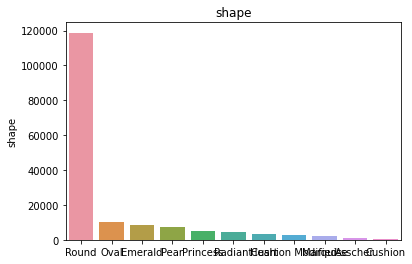

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


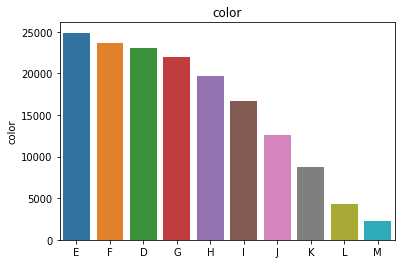

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


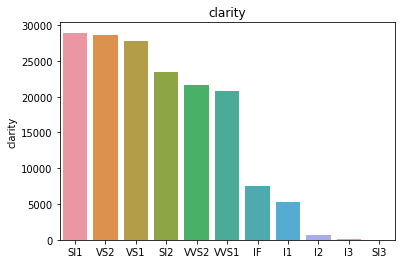

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


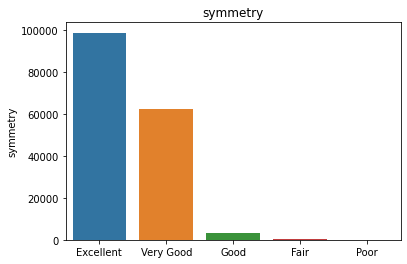

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


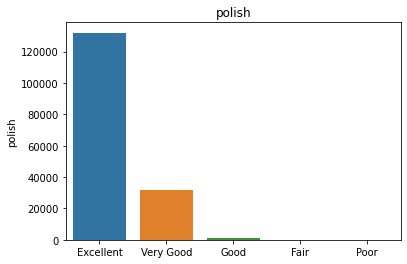

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


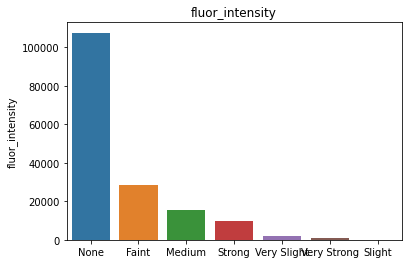

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


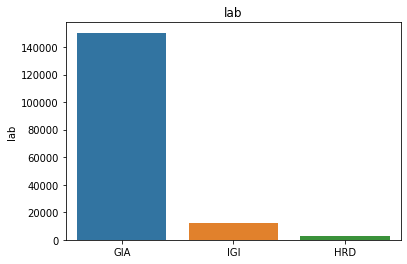

In [16]:
for name in cat_columns:
    sbn.barplot(X_train[name].value_counts().index, X_train[name].value_counts()).set_title(name)
    plt.show()

In [17]:
full_training_set = X_train
full_training_set["total_sales_price"] = y_train

full_training_set.groupby(["clarity"])['total_sales_price'].mean()

clarity
I1       5869.732585
I2       4576.511396
I3       3894.876712
IF      10643.663630
SI1      6568.993193
SI2      6555.456501
SI3       411.000000
VS1      7557.268987
VS2      7560.931020
VVS1     5673.497074
VVS2     6208.018213
Name: total_sales_price, dtype: float64

In [18]:
full_training_set.groupby(["color"])['total_sales_price'].mean()

color
D    6133.431048
E    5409.299819
F    5647.032309
G    7286.348346
H    7565.002389
I    6826.332516
J    6536.965939
K    6176.734867
L    6049.336979
M    6067.201567
Name: total_sales_price, dtype: float64

*color values are coded E been nearly colorless to M been Light Yellow color*

Refer to the link for more info https://australiandiamondimporters.com.au/colour/

In [19]:
X_train['date'].unique()

array(['2022-02-24'], dtype=object)

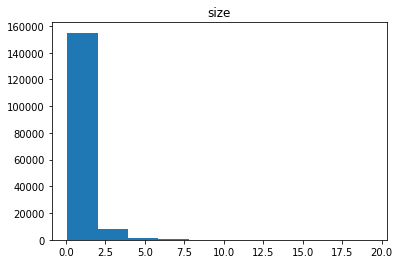

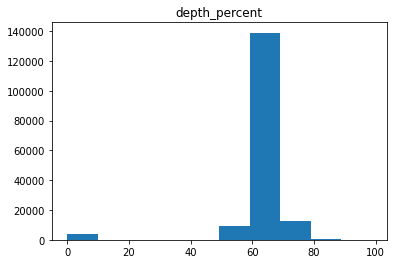

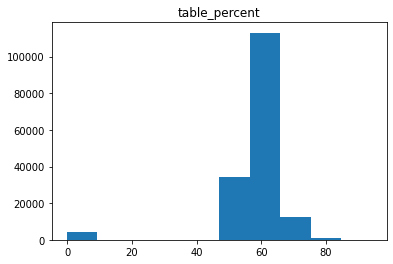

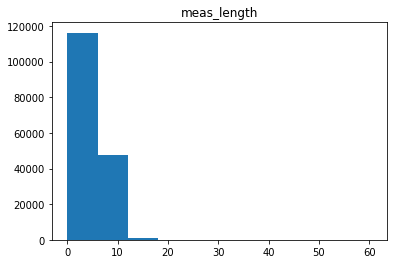

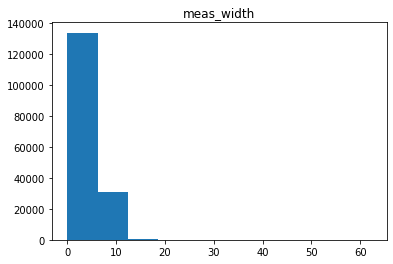

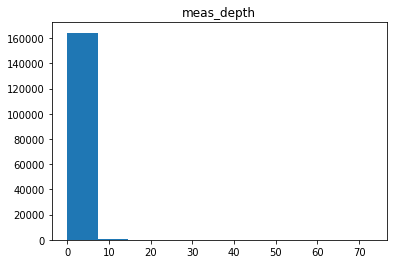

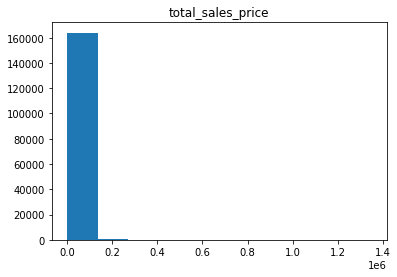

In [20]:
for name in nb_columns:
    plt.hist(X_train[name])
    plt.title(name)
    plt.show()

                       size  depth_percent  table_percent  meas_length  \
size               1.000000       0.062826       0.091877     0.786458   
depth_percent      0.062826       1.000000       0.670440     0.129603   
table_percent      0.091877       0.670440       1.000000     0.167208   
meas_length        0.786458       0.129603       0.167208     1.000000   
meas_width         0.785230       0.116696       0.138020     0.789899   
meas_depth         0.351697       0.085184       0.080895     0.344306   
total_sales_price  0.750963       0.025774       0.046430     0.497685   

                   meas_width  meas_depth  total_sales_price  
size                 0.785230    0.351697           0.750963  
depth_percent        0.116696    0.085184           0.025774  
table_percent        0.138020    0.080895           0.046430  
meas_length          0.789899    0.344306           0.497685  
meas_width           1.000000    0.411477           0.512256  
meas_depth           0.411477

<AxesSubplot:>

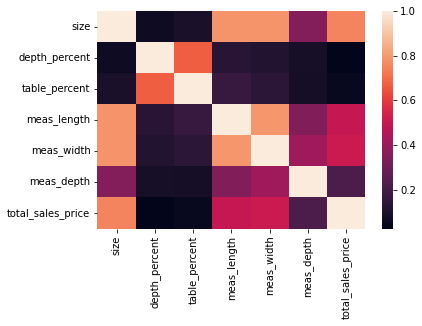

In [21]:
corr = X_train[nb_columns].corr()
print(corr)
sbn.heatmap(corr)

In [22]:
pd.pivot_table(full_training_set, index="color", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
color,,,,,,
D,61.253801,3.102761,5.287303,0.599401,57.790265,6133.431048
E,61.565332,3.053082,5.131789,0.578742,57.777985,5409.299819
F,61.804683,3.122295,5.248167,0.621431,58.036521,5647.032309
G,61.797143,3.324832,5.553861,0.743602,57.820565,7286.348346
H,61.668627,3.409113,5.693760,0.810317,57.874600,7565.002389
I,61.504584,3.433207,5.745072,0.835103,57.664528,6826.332516
J,61.723740,3.493501,5.902836,0.903574,57.831188,6536.965939
K,61.834077,3.482001,5.909209,0.931176,57.466161,6176.734867
L,61.760112,3.601897,6.079113,1.026246,57.607084,6049.336979


In [23]:
pd.pivot_table(full_training_set, index="cut", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
cut,,,,,,
Excellent,60.683147,3.211999,5.099251,0.624803,56.458998,5423.945537
Fair,61.775000,3.455000,5.612500,0.730000,62.625000,1880.250000
Good,63.800000,3.903636,7.346364,1.310909,59.727273,7157.954545
Very Good,60.754879,3.255248,5.070560,0.624044,56.174957,4041.779411


## Observations:

### Missing values
- fancy_color columns, culet_condition, fluor_color and eye_clean columns have more than 70% missing values so I will discard them for this analysis
- cut, girdle_min, girdle_max and culet_size has around 30% missing values might be removed
- fluor_intensity, color have really small missing value that need to be handled

### Feature
- Round shape diamond are dominant
- most diamonds tends to be colorless color
- prices from 200 USD -> 1.4M USD (excluding taxes)
- date has only one value feb 2022 can be discarded
- price is mostly correlated to size meas_width, meas_length
- clarity feature seems to impact the price as well

   # Feature enginnering
   

In [24]:
X_train_simplify = X_train.drop(columns = ["fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "culet_condition", "fluor_color", "eye_clean", "date", "girdle_min", "girdle_max", "culet_size", "cut"])

In [25]:
X_train_simplify.columns

Index(['clarity', 'color', 'depth_percent', 'diamond_id', 'fluor_intensity',
       'lab', 'meas_depth', 'meas_length', 'meas_width', 'polish', 'shape',
       'size', 'symmetry', 'table_percent', 'total_sales_price'],
      dtype='object')

In [26]:
X_train_simplify["is_expensive"] = X_train_simplify["total_sales_price"].apply(lambda x: 1 if x > X_train_simplify["total_sales_price"].mean() else 0)

In [27]:
pd.pivot_table(X_train_simplify, index="is_expensive", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth"])

,depth_percent,meas_depth,meas_length,size,table_percent
is_expensive,,,,,
0,61.361493,2.971827,4.974499,0.481842,57.271629
1,62.949289,4.544957,7.834039,1.845351,59.571902


In [28]:
X_full_train_simplify = X_train_simplify
X_full_train_simplify["total_sales_price"] = y_train

In [29]:
print(pd.pivot_table(X_full_train_simplify, index="is_expensive", columns="color", values="total_sales_price"))

color                    D             E             F             G  \
is_expensive                                                           
0              1921.284450   1748.052855   1899.705564   2126.313368   
1             27797.501331  26167.805303  25011.972055  25584.995657   

color                    H             I             J             K  \
is_expensive                                                           
0              2258.073839   2163.657805   2098.213826   1940.078885   
1             25158.535644  23899.395537  23139.268724  26202.291612   

color                    L             M  
is_expensive                              
0              2077.336522   2150.073158  
1             25048.650067  22692.639269  


In [30]:
X_train_simplify["is_big"] = X_train_simplify["size"].apply(lambda x: 1 if x > X_train_simplify["size"].mean() else 0)

In [31]:
X_full_train_simplify = X_train_simplify
X_full_train_simplify["total_sales_price"] = y_train
X_full_train_simplify.groupby(['is_big']).mean()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent,total_sales_price,is_expensive
is_big,,,,,,,,,
0,61.141793,1.293744e+08,2.848648,4.730693,4.510000,0.404914,56.976045,1715.998450,0.006419
1,62.918847,1.252263e+08,4.297635,7.430202,6.583624,1.562413,59.475629,18808.018655,0.648078


### Data cleaning

In [32]:
X_train_simplify.info()
X_train_simplify.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164778 entries, 73636 to 40714
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   clarity            164778 non-null  object 
 1   color              157889 non-null  object 
 2   depth_percent      164778 non-null  float64
 3   diamond_id         164778 non-null  int64  
 4   fluor_intensity    164683 non-null  object 
 5   lab                164778 non-null  object 
 6   meas_depth         164778 non-null  float64
 7   meas_length        164778 non-null  float64
 8   meas_width         164778 non-null  float64
 9   polish             164778 non-null  object 
 10  shape              164778 non-null  object 
 11  size               164778 non-null  float64
 12  symmetry           164778 non-null  object 
 13  table_percent      164778 non-null  float64
 14  total_sales_price  164778 non-null  int64  
 15  is_expensive       164778 non-null  int64  
 16 

clarity                 0
color                6889
depth_percent           0
diamond_id              0
fluor_intensity        95
lab                     0
meas_depth              0
meas_length             0
meas_width              0
polish                  0
shape                   0
size                    0
symmetry                0
table_percent           0
total_sales_price       0
is_expensive            0
is_big                  0
dtype: int64

In [33]:
X_full_train_simplify.groupby(['color']).count()

X_train_simplify.color = X_train_simplify.color.fillna("E") #fill color with most common one

In [34]:
X_full_train_simplify = X_train_simplify
X_full_train_simplify["total_sales_price"] = y_train

X_full_train_simplify.groupby(['fluor_intensity']).count()
X_train_simplify.fluor_intensity = X_train_simplify.fluor_intensity.fillna("Faint") #fill Faint most common one

### Data preparation

<AxesSubplot:>

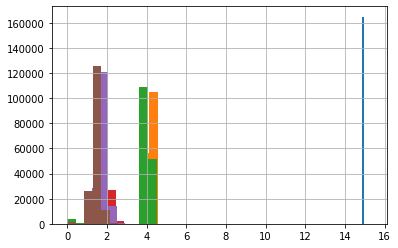

In [35]:
#normalized keeping value in a short range

#normalized log norm of size
X_train_simplify['norm_size'] =np.log(X_train_simplify.size + 1)
X_train_simplify['norm_size'].hist()

#normalized log of depth_percent
X_train_simplify["norm_depth_percent"] = np.log(X_train_simplify.depth_percent + 1)
X_train_simplify["norm_depth_percent"].hist()

#normalized log of meas_depth
X_train_simplify["norm_table_percent"] = np.log(X_train_simplify.table_percent + 1)
X_train_simplify["norm_table_percent"].hist()

#normalized log of meas_length
X_train_simplify["norm_meas_length"] = np.log(X_train_simplify.meas_length + 1)
X_train_simplify["norm_meas_length"].hist()

#normalized log of meas_width
X_train_simplify["norm_meas_width"] = np.log(X_train_simplify.meas_width + 1)
X_train_simplify["norm_meas_width"].hist()

#normalized log of meas_depth
X_train_simplify["norm_meas_depth"] = np.log(X_train_simplify.meas_depth + 1)
X_train_simplify["norm_meas_depth"].hist()


In [36]:
X_train_dummmies = pd.get_dummies(X_train_simplify[['norm_size', 'norm_depth_percent', 'norm_table_percent', 'norm_meas_length', 'norm_meas_width', 'norm_meas_depth', 'total_sales_price', 'shape', 'color', 'clarity', 'symmetry', 'polish', 'fluor_intensity', 'lab', 'is_big', 'is_expensive']])

In [37]:
X_train_dummmies.head(100)

,norm_size,norm_depth_percent,norm_table_percent,norm_meas_length,norm_meas_width,norm_meas_depth,total_sales_price,is_big,is_expensive,shape_Asscher,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
73636,14.845568,4.127134,4.110874,1.627278,1.635106,1.255616,1082,0,0,0,...,0,0,1,0,0,0,0,1,0,0
185258,14.845568,4.185099,4.158883,2.276241,1.870263,1.515127,8818,1,1,0,...,0,0,1,0,0,0,0,1,0,0
210771,14.845568,4.298645,4.290459,2.086914,2.080691,1.806648,24113,1,1,0,...,0,0,1,0,0,0,0,1,0,0
187064,14.845568,4.171306,4.043051,1.954445,1.961502,1.587192,9605,1,1,0,...,0,0,1,0,0,0,0,1,0,0
90515,14.845568,4.120662,4.094345,1.808289,1.813195,1.410987,1386,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22722,14.845568,4.127134,4.127134,1.663926,1.669592,1.286474,744,0,0,0,...,0,0,1,0,0,0,0,1,0,0
140488,14.845568,4.282206,4.234107,1.897620,1.644805,1.381282,3373,0,0,0,...,0,1,0,0,0,0,0,1,0,0
190805,14.845568,4.143135,4.007333,1.969906,1.974081,1.576915,10004,1,1,0,...,0,0,1,0,0,0,0,1,0,0
37304,14.845568,4.115780,4.060443,1.887070,1.568616,1.190888,858,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [38]:
#scaling (keeping numeric value in normal distribution)
scale = StandardScaler()

In [39]:
X_train_dummmies_scaled = X_train_dummmies.copy()
X_train_dummmies_scaled[["norm_size", "norm_depth_percent", "norm_table_percent", "norm_meas_length", "norm_meas_width", "norm_meas_depth"]] = scale.fit_transform(X_train_dummmies_scaled[["norm_size", "norm_depth_percent", "norm_table_percent", "norm_meas_length", "norm_meas_width", "norm_meas_depth"]])
X_train_dummmies_scaled

,norm_size,norm_depth_percent,norm_table_percent,norm_meas_length,norm_meas_width,norm_meas_depth,total_sales_price,is_big,is_expensive,shape_Asscher,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
73636,-8.881784e-15,0.097501,0.182963,-0.789459,-0.626749,-0.724417,1082,0,0,0,...,0,0,1,0,0,0,0,1,0,0
185258,-8.881784e-15,0.194060,0.259528,1.567702,0.334489,0.395826,8818,1,1,0,...,0,0,1,0,0,0,0,1,0,0
210771,-8.881784e-15,0.383208,0.469365,0.880028,1.194645,1.654246,24113,1,1,0,...,0,0,1,0,0,0,0,1,0,0
187064,-8.881784e-15,0.171083,0.074800,0.398876,0.707445,0.706912,9605,1,1,0,...,0,0,1,0,0,0,0,1,0,0
90515,-8.881784e-15,0.086719,0.156602,-0.131992,0.101216,-0.053721,1386,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75681,-8.881784e-15,-6.777593,0.088728,-0.403916,-0.153270,-0.225554,1104,0,0,0,...,0,0,1,0,0,0,0,0,0,1
154023,-8.881784e-15,0.134698,0.102536,0.165146,0.440183,0.367269,3980,0,0,0,...,0,0,1,0,0,0,0,0,0,1
13171,-8.881784e-15,0.108214,0.074800,0.165146,-0.941339,-0.990733,664,0,0,0,...,0,0,1,0,0,0,0,1,0,0
115114,-8.881784e-15,0.105542,0.143256,0.251889,0.537224,0.405303,2236,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
X_train = X_train_dummmies_scaled


# Basic model building

## Algorithms selection (regression)
1. LinearRegression
2. SGDRegressor
3. ElasticNet
4. Lasso
5. SVR (Support Vector Regression)

In [44]:
lr = LinearRegression()
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [45]:
sgd = SGDRegressor()
cv = cross_val_score(sgd, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[-4.90848119e+25 -5.59067356e+23 -1.01897004e+25 -1.21554457e+23
 -2.45695352e+27]
-5.0338173145166466e+26


In [48]:
en = ElasticNet(random_state=0)
cv = cross_val_score(en, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [49]:
lasso = Lasso(alpha=0.1)
cv = cross_val_score(lasso, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [ ]:
svr = SVR()
cv = cross_val_score(svr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())